In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler

sns.set(style="whitegrid")
df = pd.read_csv('Housing.csv')
print(df.head())
print(df.info())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [7]:
print("Missing values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

Missing values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Summary Statistics:
               price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

    

In [3]:
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 
            'mainroad', 'prefarea', 'airconditioning', 'furnishingstatus']
X = df[features]
y = df['price'] 

le = LabelEncoder()

binary_cols = ['mainroad', 'prefarea', 'airconditioning']
for col in binary_cols:
    X[col] = le.fit_transform(X[col]) 

X['furnishingstatus'] = X['furnishingstatus'].astype('category').cat.codes

C:\Users\daudr\AppData\Local\Temp\ipykernel_27368\69712519.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\daudr\AppData\Local\Temp\ipykernel_27368\69712519.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\daudr\AppData\Local\Temp\ipykernel_27368\69712519.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=features)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

def evaluate_model(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{name} Results:")
    print(f"  MAE: ₹{mae:,.2f}")
    print(f"  RMSE: ₹{rmse:,.2f}")
    print()
    return mae, rmse

mae_lr, rmse_lr = evaluate_model(y_test, y_pred_lr, "Linear Regression")
mae_gb, rmse_gb = evaluate_model(y_test, y_pred_gb, "Gradient Boosting")

Linear Regression Results:
  MAE: ₹1,017,161.83
  RMSE: ₹1,372,047.16

Gradient Boosting Results:
  MAE: ₹1,031,352.02
  RMSE: ₹1,471,924.04



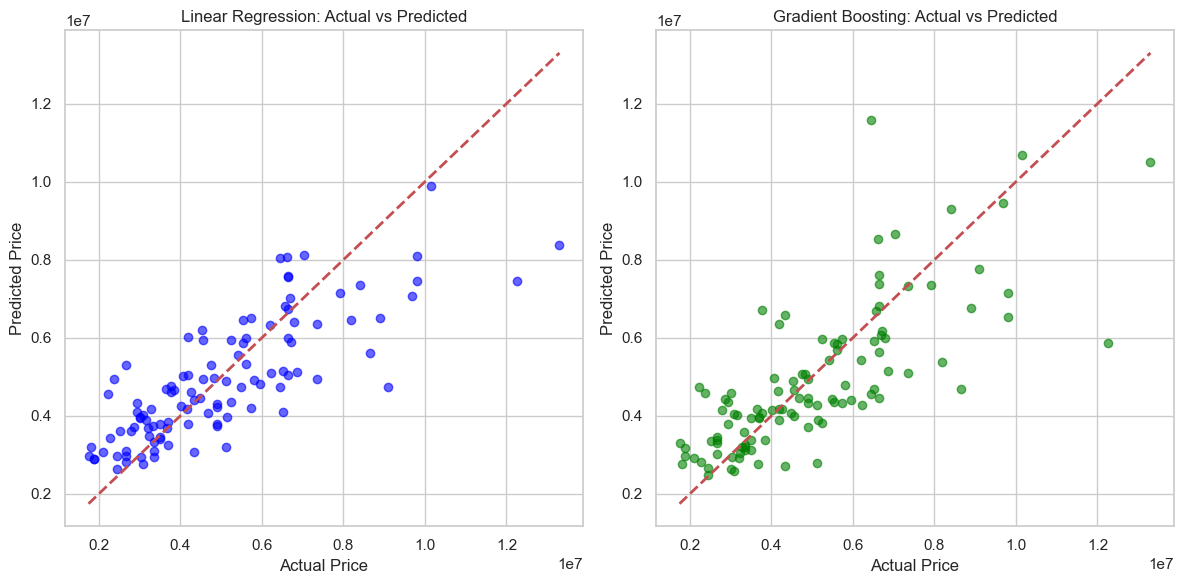

In [18]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression: Actual vs Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_gb, alpha=0.6, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Gradient Boosting: Actual vs Predicted')

plt.tight_layout()
plt.show()

C:\Users\daudr\AppData\Local\Temp\ipykernel_1616\3535012165.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importance.values, y=feat_importance.index, palette="viridis")


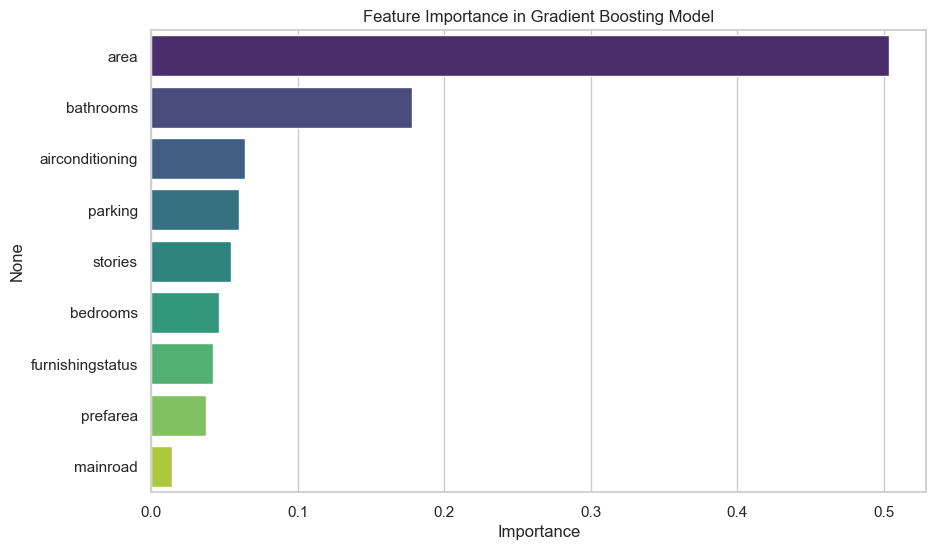

Feature Importance:
 area                0.503708
bathrooms           0.177850
airconditioning     0.063822
parking             0.060045
stories             0.054160
bedrooms            0.046049
furnishingstatus    0.042427
prefarea            0.037524
mainroad            0.014416
dtype: float64


In [19]:
importances = gb_model.feature_importances_
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance.values, y=feat_importance.index, palette="viridis")
plt.title('Feature Importance in Gradient Boosting Model')
plt.xlabel('Importance')
plt.show()

print("Feature Importance:\n", feat_importance)